In [1]:
import pandas as pd
import numpy as np
import logging

In [2]:
submission_format = pd.read_csv('data/submission_format.csv')
test_set_features = pd.read_csv('data/test_set_features.csv')
training_set_features = pd.read_csv('data/training_set_features.csv')
training_set_labels = pd.read_csv('data/training_set_labels.csv')

In [3]:
df = pd.merge(training_set_features, training_set_labels, how='outer')

In [4]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [5]:
logging.basicConfig(level=logging.INFO)

In [6]:
def data_cleaning(data):
    # Setting the index to respondent_id
    df.set_index('respondent_id', inplace=True)
    # Drop employment columns
    data.drop(columns=['employment_occupation', 'employment_industry'], inplace=True)
    # Fill NAN's with 0 in specified column
    data[['doctor_recc_h1n1', 'doctor_recc_seasonal', 'health_insurance']].fillna(0, inplace=True)
    # Dropping remaining NA's
    data.dropna(axis=0, inplace=True)

    logging.info(' Data has been cleaned')
    return data

In [7]:
df_cleaned = data_cleaning(df)

/tmp/ipykernel_60214/4289504782.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['doctor_recc_h1n1', 'doctor_recc_seasonal', 'health_insurance']].fillna(0, inplace=True)
INFO:root: Data has been cleaned


In [8]:
df_cleaned

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,1,1
9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,0,0
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Not in Labor Force,kbazzjca,"MSA, Principle City",1.0,0.0,0,0
26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,0,0


In [ ]:
# Cleaning duplicates -
# Removing missing values -
# Checking for outliers

In [9]:
df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

<AxesSubplot:xlabel='h1n1_knowledge'>

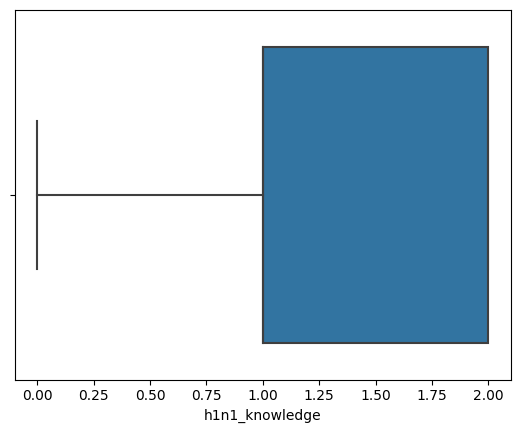

In [13]:
sns.boxplot(data=df_cleaned, x='h1n1_knowledge')